<a href="https://colab.research.google.com/github/SolFreire/AdalineModelImplementationinR3/blob/main/AdalineArtificialII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class Adaline:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        X = np.c_[X, np.ones(X.shape[0])]
        self.w = np.zeros(X.shape[1])
        self.loss_history = []

        for _ in range(self.epochs):
            y_pred = X.dot(self.w)

            # erro
            error = y - y_pred

            # SSE (sum squared error)
            loss = 0.5 * (error ** 2).sum()
            self.loss_history.append(loss)

            # regra de atualização (gradiente batch)
            gradient = -X.T.dot(error)
            self.w -= self.lr * gradient

    def predict(self, X):
        X = np.c_[X, np.ones(X.shape[0])]
        return X.dot(self.w)


In [8]:
a = 2.5
b = 1.0
c= 4.0

In [21]:
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
ruido = np.random.randn(100)
y = a * x1 + b * x2 + c + ruido

In [25]:
X = np.column_stack((x1, x2))

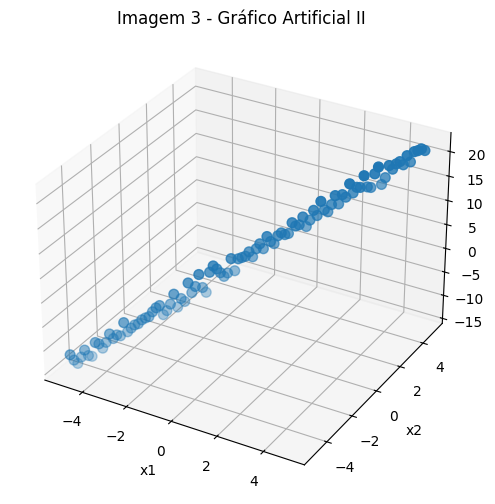

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x1, x2, y, s=50)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("a")

plt.title("Imagem 3 - Gráfico Artificial II")
plt.show()

In [27]:
def run_experiments_same_data(X, y, num_runs=20):
    mses = []
    rmses = []
    models = []

    for _ in range(num_runs):
        model = Adaline(learning_rate=0.001, epochs=50)
        model.fit(X, y)
        y_pred = model.predict(X)

        mse = np.mean((y - y_pred) ** 2)
        rmse = np.sqrt(mse)

        mses.append(mse)
        rmses.append(rmse)
        models.append(model)

    return np.array(mses), np.array(rmses), models

In [31]:
mses, rmses, models = run_experiments_same_data(X, y)
print("MSE médio:", mses.mean())
print("Desvio-padrão do MSE:", mses.std())
print("RMSE médio:", rmses.mean())
print("Desvio-padrão do RMSE:", rmses.std())


MSE médio: 1.0342976399291495
Desvio-padrão do MSE: 2.220446049250313e-16
RMSE médio: 1.0170042477439063
Desvio-padrão do RMSE: 2.220446049250313e-16


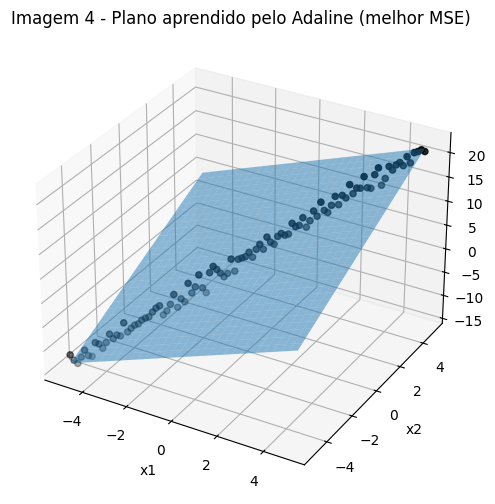

In [37]:
best_model = models[np.argmin(mses)]
w1, w2, bias = best_model.w

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# scatter dos dados
ax.scatter(x1, x2, y, color="black", s=20)

# superfície do plano
x1_grid, x2_grid = np.meshgrid(np.linspace(-5, 5, 30),
                               np.linspace(-5, 5, 30))
y_grid = w1 * x1_grid + w2 * x2_grid + bias

ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5)

ax.set_title("Imagem 4 - Plano aprendido pelo Adaline (melhor MSE)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

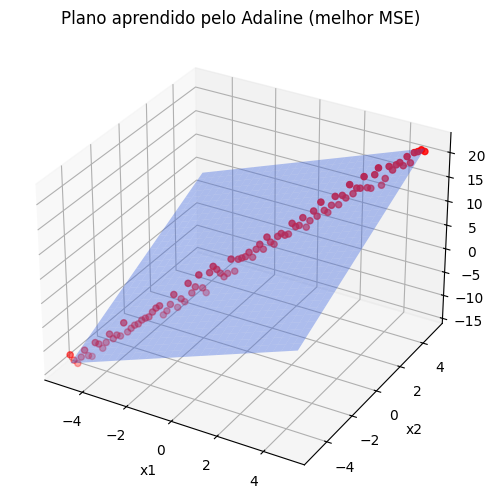

In [34]:
best_model = models[np.argmin(mses)]
w1, w2, bias = best_model.w

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# scatter dos dados: PRETO
ax.scatter(x1, x2, y, color="red", s=20, label="Dados")

# superfície do plano: AZUL CLARO
x1_grid, x2_grid = np.meshgrid(np.linspace(-5, 5, 30),
                               np.linspace(-5, 5, 30))
y_grid = w1 * x1_grid + w2 * x2_grid + bias

ax.plot_surface(
    x1_grid, x2_grid, y_grid,
    alpha=0.4,
    color="royalblue",
    edgecolor="none"
)

ax.set_title("Plano aprendido pelo Adaline (melhor MSE)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

plt.show()